In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# BCE classifier

> API details.

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
from pytorch_inferno.model_wrapper import ModelWrapper
from pytorch_inferno.callback import *
from pytorch_inferno.data import get_paper_data
from pytorch_inferno.plotting import *
from pytorch_inferno.inference import *
from pytorch_inferno.utils import *

from fastcore.all import partialler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from typing import *
from collections import OrderedDict

import torch.nn as nn
from torch import optim
import torch
from torch import Tensor
from torch import autograd

In [ ]:
net = nn.Sequential(nn.Linear(3,100),  nn.ReLU(),
                    nn.Linear(100,100),nn.ReLU(),
                    nn.Linear(100,1),  nn.Sigmoid())
init_net(net)

In [ ]:
model = ModelWrapper(net)

data, test = get_paper_data(200000, bm=0, bs=32, n_test=1000000)

In [ ]:
model.fit(200, data=data, opt=partialler(optim.SGD,lr=2e-3), loss=nn.BCELoss(),
          cbs=[LossTracker(),SaveBest('weights/best.h5'),EarlyStopping(5)])

model.save('weights/BCE_Test.h5')

1: Train=0.3929350734615326 Valid=0.3533997430419922
2: Train=0.3428666669535637 Valid=0.3392838264608383
3: Train=0.33703843059420585 Valid=0.337627055850029
4: Train=0.3358436953032017 Valid=0.3372601434993744
5: Train=0.33525460687756536 Valid=0.3367564226770401
6: Train=0.3348833509504795 Valid=0.3359000786161423
7: Train=0.3346021106350422 Valid=0.3357079481935501
8: Train=0.33429210242152213 Valid=0.33539626185417176
9: Train=0.3339586520969868 Valid=0.335367881603241
10: Train=0.3337059416949749 Valid=0.33471191918373105
11: Train=0.3335008493721485 Valid=0.33595116535663605
12: Train=0.33324935972690584 Valid=0.3361800316762924
13: Train=0.33307586876392364 Valid=0.33485937933444976
14: Train=0.33287537781715393 Valid=0.33491533747673036
15: Train=0.33275036828994753 Valid=0.33470407435417177
16: Train=0.3326913898408413 Valid=0.33388066996097565
17: Train=0.3325934296643734 Valid=0.33444666235923765
18: Train=0.33246899418115616 Valid=0.33404065371513364
19: Train=0.3323910059

In [ ]:
model.load('weights/BCE_Test.h5')

## BM 0

In [ ]:
preds = model.predict(test)

In [ ]:
preds

array([[8.7715566e-01],
       [6.2459314e-01],
       [3.3422965e-01],
       ...,
       [5.1873261e-01],
       [1.7345505e-03],
       [1.7424367e-07]], dtype=float32)

In [ ]:
df = pd.DataFrame({'pred':preds.squeeze()})
df['gen_target'] = test.dataset.y
df.head()

,pred,gen_target
0,0.877156,1.0
1,0.624593,1.0
2,0.334230,1.0
3,0.893375,1.0
4,0.861268,1.0


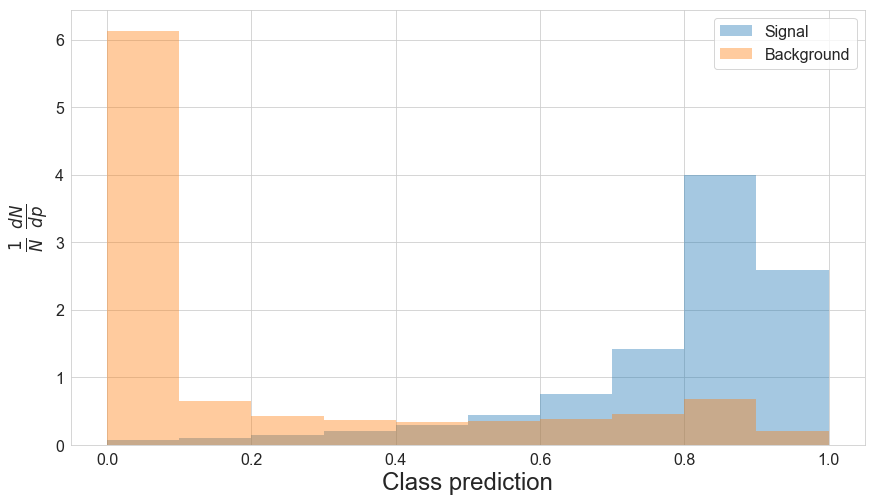

In [ ]:
plot_preds(df)

In [ ]:
bin_preds(df, np.linspace(0,1,11))

In [ ]:
df.head()

,pred,gen_target,pred_bin
0,0.877156,1.0,8
1,0.624593,1.0,6
2,0.334230,1.0,3
3,0.893375,1.0,8
4,0.861268,1.0,8


In [ ]:
f_s,f_b = get_shape(df,1),get_shape(df,0)

In [ ]:
f_s.sum(), f_b.sum()

(tensor(1.), tensor(1.))

In [ ]:
f_s, f_b

(tensor([1.7582e-02, 1.4720e-02, 1.9844e-02, 2.8690e-02, 4.4452e-02, 7.5204e-02,
         1.4239e-01, 3.9895e-01, 2.5817e-01, 2.0000e-13]),
 tensor([6.7820e-01, 4.3186e-02, 3.6242e-02, 3.4096e-02, 3.5046e-02, 3.8670e-02,
         4.6028e-02, 6.7970e-02, 2.0562e-02, 2.0000e-13]))

In [ ]:
asimov = (50*f_s)+(1000*f_b)

In [ ]:
asimov, asimov.sum()

(tensor([6.7908e+02, 4.3922e+01, 3.7234e+01, 3.5531e+01, 3.7269e+01, 4.2430e+01,
         5.3148e+01, 8.7918e+01, 3.3470e+01, 2.1000e-10]), tensor(1050.))

In [ ]:
n = 1050
x = np.linspace(20,80,61)
y = np.zeros_like(x)
for i,m in enumerate(x):
    pois = torch.distributions.Poisson((m*f_s)+(1000*f_b))
    y[i] = -pois.log_prob(asimov).sum()
y

array([28.94190216, 28.7849884 , 28.63453674, 28.49035645, 28.35193634,
       28.22058868, 28.09484863, 27.97447205, 27.86110687, 27.75288391,
       27.65000153, 27.55319977, 27.46237946, 27.3761673 , 27.29584503,
       27.22137451, 27.15120697, 27.08669281, 27.02735901, 26.97356415,
       26.92388916, 26.87958527, 26.84018707, 26.80565643, 26.77593994,
       26.7509079 , 26.73054504, 26.71475983, 26.70363617, 26.69694519,
       26.69470215, 26.69690704, 26.70349121, 26.71431732, 26.7294693 ,
       26.7488327 , 26.77232361, 26.79994202, 26.83172607, 26.8674469 ,
       26.90718842, 26.9508667 , 26.99853516, 27.05004883, 27.10534668,
       27.16442108, 27.22733307, 27.29391479, 27.36419678, 27.43811035,
       27.515625  , 27.59673309, 27.68134308, 27.76944733, 27.8611145 ,
       27.95615387, 28.05457306, 28.15639496, 28.26155853, 28.37001038,
       28.48175812])

In [ ]:
y_tf2 = np.array([31.626238,31.466385,31.313095,31.166267,31.025808,30.891619,30.76361
,30.641693,30.525778,30.415783,30.31162,30.213215,30.120483,30.033348
,29.951736,29.875574,29.804789,29.739307,29.679066,29.623993,29.574026
,29.5291,29.489151,29.454117,29.423939,29.398558,29.377914,29.361954
,29.35062,29.343859,29.341618,29.343842,29.350483,29.36149,29.376812
,29.396404,29.420216,29.448202,29.480318,29.516518,29.556757,29.600994
,29.649185,29.70129,29.757267,29.817076,29.88068,29.948036,30.019108
,30.093859,30.17225,30.25425,30.339819,30.42892,30.521524,30.617598
,30.7171,30.820007,30.926281,31.035892,31.148808], dtype='float32')

In [ ]:
y_tf2-y_tf2.min()

array([2.2846203e+00, 2.1247673e+00, 1.9714775e+00, 1.8246498e+00,
       1.6841908e+00, 1.5500011e+00, 1.4219933e+00, 1.3000755e+00,
       1.1841602e+00, 1.0741653e+00, 9.7000313e-01, 8.7159729e-01,
       7.7886581e-01, 6.9173050e-01, 6.1011887e-01, 5.3395653e-01,
       4.6317101e-01, 3.9768982e-01, 3.3744812e-01, 2.8237534e-01,
       2.3240852e-01, 1.8748283e-01, 1.4753342e-01, 1.1249924e-01,
       8.2321167e-02, 5.6940079e-02, 3.6296844e-02, 2.0336151e-02,
       9.0026855e-03, 2.2411346e-03, 0.0000000e+00, 2.2239685e-03,
       8.8653564e-03, 1.9872665e-02, 3.5194397e-02, 5.4786682e-02,
       7.8598022e-02, 1.0658455e-01, 1.3870049e-01, 1.7490005e-01,
       2.1513939e-01, 2.5937653e-01, 3.0756760e-01, 3.5967255e-01,
       4.1564941e-01, 4.7545815e-01, 5.3906250e-01, 6.0641861e-01,
       6.7749023e-01, 7.5224113e-01, 8.3063316e-01, 9.1263199e-01,
       9.9820137e-01, 1.0873032e+00, 1.1799068e+00, 1.2759800e+00,
       1.3754826e+00, 1.4783897e+00, 1.5846634e+00, 1.6942749e

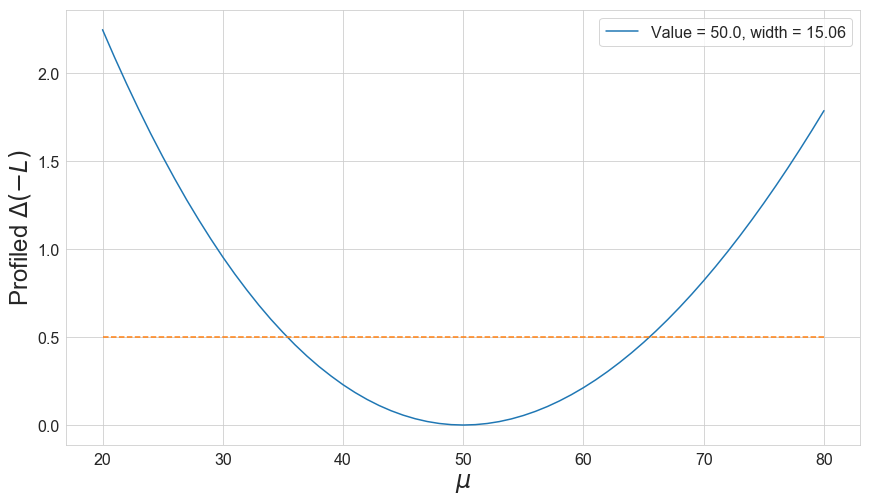

In [ ]:
plot_likelihood(y-y.min())

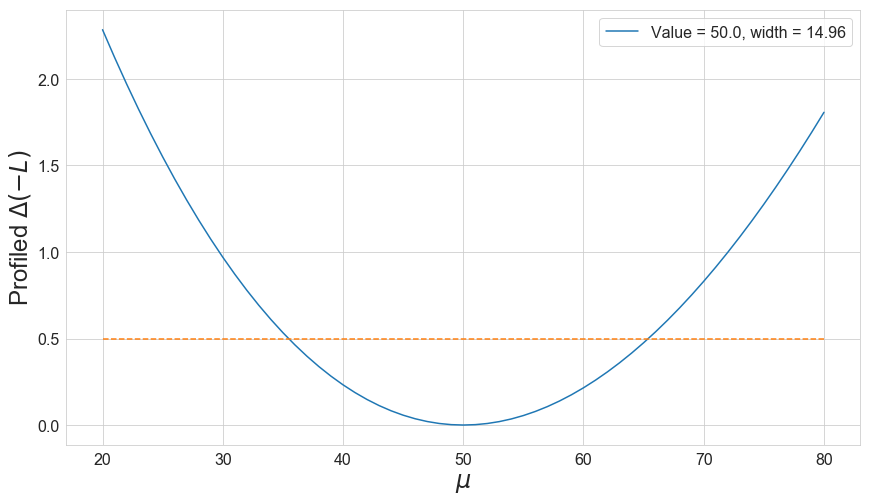

In [ ]:
plot_likelihood(y_tf2-y_tf2.min())

# Nuisances - via interpolation

In [ ]:
bkg = test.dataset.x[test.dataset.y.squeeze() == 0]
assert len(bkg) == 500000

In [ ]:
b_shapes = get_paper_syst_shapes(bkg, df, model=model, bins=np.linspace(0,1,11))

Running: r=-0.2


Running: r=0


Running: r=0.2


Running: l=2.5


Running: l=3


Running: l=3.5


In [ ]:
df

,pred,gen_target,pred_bin,pred_-0.2_3,pred_-0.2_3_bin,pred_0_3,pred_0_3_bin,pred_0.2_3,pred_0.2_3_bin,pred_0_2.5,pred_0_2.5_bin,pred_0_3.5,pred_0_3.5_bin
0,8.771557e-01,1.0,8,8.771557e-01,8,8.771557e-01,8,8.771557e-01,8,8.771557e-01,8,8.771557e-01,8
1,6.245931e-01,1.0,6,6.245931e-01,6,6.245931e-01,6,6.245931e-01,6,6.245931e-01,6,6.245931e-01,6
2,3.342296e-01,1.0,3,3.342296e-01,3,3.342296e-01,3,3.342296e-01,3,3.342296e-01,3,3.342296e-01,3
3,8.933755e-01,1.0,8,8.933755e-01,8,8.933755e-01,8,8.933755e-01,8,8.933755e-01,8,8.933755e-01,8
4,8.612680e-01,1.0,8,8.612680e-01,8,8.612680e-01,8,8.612680e-01,8,8.612680e-01,8,8.612680e-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,9.326302e-04,0.0,0,1.191390e-03,0,9.326302e-04,0,6.298868e-04,0,9.228574e-04,0,9.459511e-04,0
999996,7.217108e-01,0.0,7,7.747283e-01,7,7.217108e-01,7,6.619834e-01,6,7.156506e-01,7,7.277966e-01,7
999997,5.187326e-01,0.0,5,5.766761e-01,5,5.187326e-01,5,4.337353e-01,4,5.114210e-01,5,5.248845e-01,5
999998,1.734550e-03,0.0,0,2.941825e-03,0,1.734550e-03,0,1.023706e-03,0,1.669473e-03,0,1.813713e-03,0


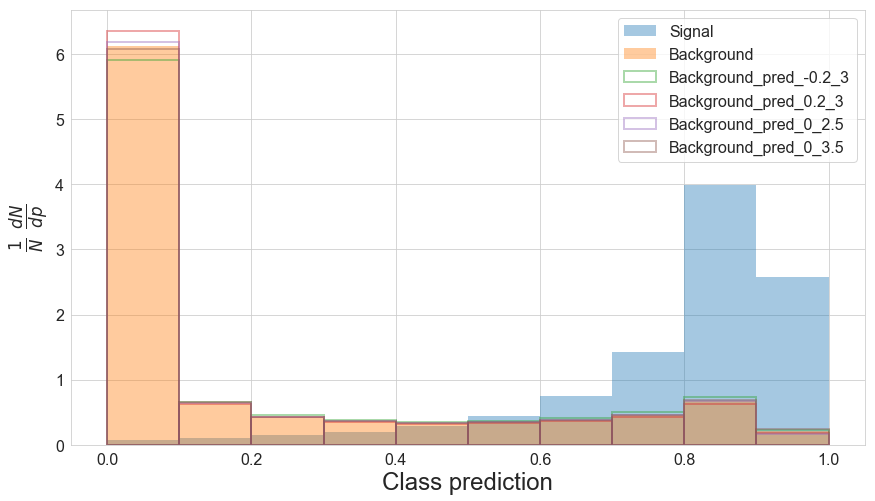

In [ ]:
plot_preds(df, pred_names=['pred', 'pred_-0.2_3', 'pred_0.2_3', 'pred_0_2.5', 'pred_0_3.5'])

In [ ]:
b_shapes['f_b_nom']

tensor([6.7820e-01, 4.3186e-02, 3.6242e-02, 3.4096e-02, 3.5046e-02, 3.8670e-02,
        4.6028e-02, 6.7970e-02, 2.0562e-02, 2.0000e-13])

In [ ]:
b_shapes['f_b_up']

tensor([[6.9883e-01, 4.2028e-02, 3.4516e-02, 3.2220e-02, 3.2812e-02, 3.6130e-02,
         4.2658e-02, 6.2420e-02, 1.8390e-02, 2.0000e-13],
        [6.7344e-01, 4.3248e-02, 3.6234e-02, 3.4114e-02, 3.4934e-02, 3.8668e-02,
         4.5986e-02, 6.8430e-02, 2.4950e-02, 2.0000e-13]])

In [ ]:
b_shapes['f_b_dw']

tensor([[6.5752e-01, 4.5168e-02, 3.7486e-02, 3.5712e-02, 3.7262e-02, 4.1066e-02,
         4.9674e-02, 7.3560e-02, 2.2556e-02, 2.0000e-13],
        [6.8301e-01, 4.3138e-02, 3.6280e-02, 3.3944e-02, 3.5236e-02, 3.8696e-02,
         4.5882e-02, 6.7760e-02, 1.6052e-02, 2.0000e-13]])

In [ ]:
f_s

tensor([1.7582e-02, 1.4720e-02, 1.9844e-02, 2.8690e-02, 4.4452e-02, 7.5204e-02,
        1.4239e-01, 3.9895e-01, 2.5817e-01, 2.0000e-13])

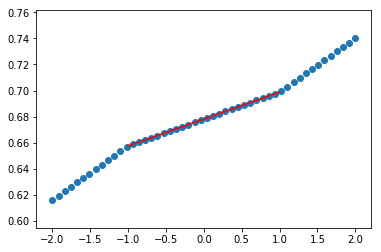

In [ ]:
i = 0
d = b_shapes['f_b_dw'][0][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][0][i]
interp = []
rs = np.linspace(-2,2)
for r in rs: interp.append(interp_shape(Tensor((r,0))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(rs, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

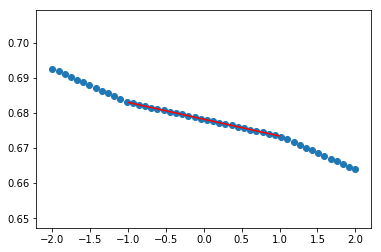

In [ ]:
i = 0
d = b_shapes['f_b_dw'][1][i]
n = b_shapes['f_b_nom'][i]
u = b_shapes['f_b_up'][1][i]
interp = []
ls = np.linspace(-2,2)
for l in ls: interp.append(interp_shape(Tensor((0,l))[None,:], **b_shapes)[0][i].data.item())
plt.scatter(ls, interp)
plt.plot([-1,0,1],[d,n,u], label=i, color='r')

In [ ]:
b_shapes['f_b_nom']

tensor([6.7820e-01, 4.3186e-02, 3.6242e-02, 3.4096e-02, 3.5046e-02, 3.8670e-02,
        4.6028e-02, 6.7970e-02, 2.0562e-02, 2.0000e-13])

In [ ]:
alpha = Tensor((1,0))[None,:]
interp_shape(alpha, **b_shapes).squeeze()

tensor([6.9883e-01, 4.2028e-02, 3.4516e-02, 3.2220e-02, 3.2812e-02, 3.6130e-02,
        4.2658e-02, 6.2420e-02, 1.8390e-02, 2.0000e-13])

In [ ]:
b_shapes['f_b_up']

tensor([[6.9883e-01, 4.2028e-02, 3.4516e-02, 3.2220e-02, 3.2812e-02, 3.6130e-02,
         4.2658e-02, 6.2420e-02, 1.8390e-02, 2.0000e-13],
        [6.7344e-01, 4.3248e-02, 3.6234e-02, 3.4114e-02, 3.4934e-02, 3.8668e-02,
         4.5986e-02, 6.8430e-02, 2.4950e-02, 2.0000e-13]])

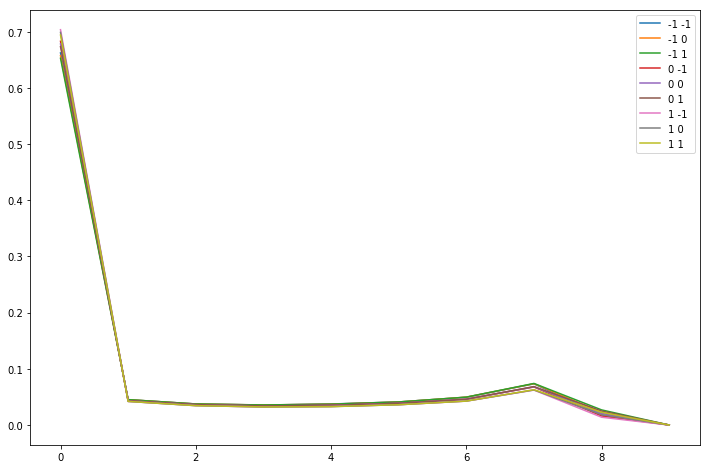

In [ ]:
fig = plt.figure(figsize=(12,8))
for r in [-1,0,1]:
    for l in [-1,0,1]:
        alpha = Tensor((r,l))[None,:]
        s = interp_shape(alpha, **b_shapes).squeeze()
        plt.plot(s, label=f'{r} {l}')
plt.legend()

# Newton

In [ ]:
torch.repeat_interleave()

In [ ]:
def jacobian(y, x, create_graph=False):                                                               
    jac = []                                                                                          
    flat_y = y.reshape(-1)                                                                            
    grad_y = torch.zeros_like(flat_y)                                                                 
    for i in range(len(flat_y)):                                                                      
        grad_y[i] = 1.                                                                                
        grad_x, = torch.autograd.grad(flat_y, x, grad_y, retain_graph=True, create_graph=create_graph)
        jac.append(grad_x.reshape(x.shape))                                                           
        grad_y[i] = 0.                                                                                
    return torch.stack(jac).reshape(y.shape + x.shape)                                                
                                                                                                      
def hessian(y, x):                                                                                    
    return jacobian(jacobian(y, x, create_graph=True), x)

In [ ]:
nll.shape, alpha.shape

(torch.Size([]), torch.Size([2]))

In [ ]:
nll, alpha

(tensor(28.9419, grad_fn=<NegBackward>), tensor([0., 0.], requires_grad=True))

In [ ]:
g = jacobian(nll, alpha, create_graph=True)
g.shape, g

(torch.Size([2]), tensor([ 2.1000, -1.3890], grad_fn=<ViewBackward>))

In [ ]:
h = jacobian(g, alpha, create_graph=True)
h.shape, h

(torch.Size([2, 2]), tensor([[ 2.1448, -0.6419],
         [-0.6419,  1.0498]], grad_fn=<ViewBackward>))

In [ ]:
def calc_grad_hesse(nll:Tensor, alpha:Tensor) -> Tuple[Tensor,Tensor]:
    grad = jacobian(nll, alpha, create_graph=True)
    hesse = jacobian(grad, alpha, create_graph=True)
    alpha.grad=None
    return grad, hesse

In [ ]:
def calc_nll(s_true:float, b_true:float, s_exp:Tensor, f_s:Tensor, alpha:Tensor,
             f_b_nom:Tensor, f_b_up:Tensor, f_b_dw:Tensor) -> Tensor:
    f_b = interp_shape(alpha, f_b_nom, f_b_up, f_b_dw)
    t_exp = (s_exp*f_s)+(b_true*f_b)
    asimov = (s_true*f_s)+(b_true*f_b_nom)
    p = torch.distributions.Poisson(t_exp)
    return -p.log_prob(asimov).sum()

In [ ]:
from fastprogress import progress_bar

def calc_profile(f_s:Tensor, f_b_nom:Tensor, f_b_up:Tensor, f_b_dw:Tensor, n:int,
                 mu_scan:Tensor, true_mu:int, n_steps:int=100, lr:float=0.1,  verbose:bool=True) -> Tensor:
    f_b_nom = f_b_nom.unsqueeze(0)
    get_nll = partialler(calc_nll, s_true=true_mu, b_true=n-true_mu, f_s=f_s, f_b_nom=f_b_nom, f_b_up=f_b_up, f_b_dw=f_b_dw)
    nlls = []
    for mu in progress_bar(mu_scan, display=verbose):
        alpha = torch.zeros((f_b_up.shape[0]), requires_grad=True, device=f_b_nom.device)
        for i in range(n_steps):  # Newton optimise nuisances
            nll = get_nll(alpha=alpha, s_exp=mu)
            grad, hesse = calc_grad_hesse(nll, alpha)
            step = lr*grad.detach()@torch.inverse(hesse)
            print(step.shape)
            step = torch.clamp(step, -100, 100)
            alpha = alpha-step
        nlls.append(get_nll(alpha=alpha, s_exp=mu))
    return torch.stack(nlls)

In [ ]:
profiler = partialler(calc_profile, n=1050, mu_scan=torch.linspace(20,80,61), true_mu=50)

## BM 1
r free, l fixed

In [ ]:
bm1_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                            ('f_b_up',  b_shapes['f_b_up'][0][None,:]),
                            ('f_b_dw',  b_shapes['f_b_dw'][0][None,:])])

In [ ]:
bm1_b_shapes['f_b_up'].shape

torch.Size([1, 10])

In [ ]:
nll = profiler(f_s=f_s, n_steps=100, **bm1_b_shapes)

KeyboardInterrupt: 

In [ ]:
nll = to_np(nll)

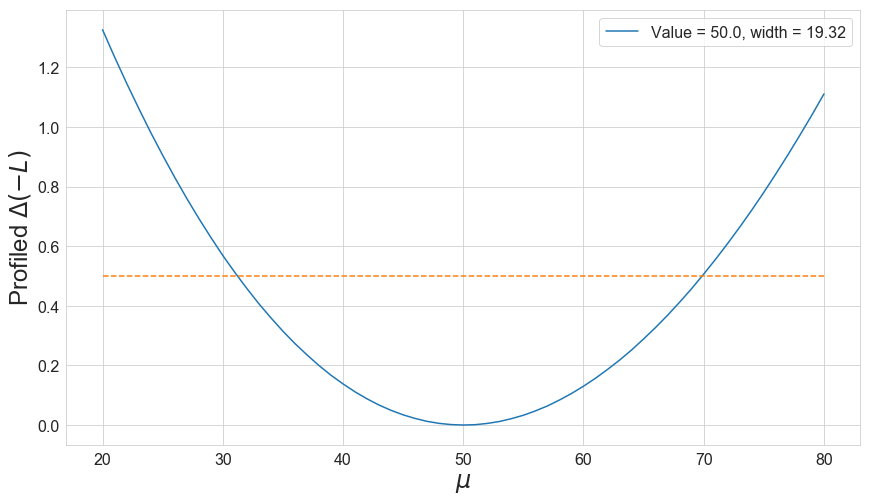

In [ ]:
plot_likelihood(nll-nll.min())

## BM 1l
r fixed, l free

In [ ]:
bm1l_b_shapes = OrderedDict([('f_b_nom', b_shapes['f_b_nom']),
                             ('f_b_up',  b_shapes['f_b_up'][1][None,:]),
                             ('f_b_dw',  b_shapes['f_b_dw'][1][None,:])])

In [ ]:
nll = profiler(f_s=f_s, n_steps=100, **bm1l_b_shapes)

In [ ]:
nll = to_np(nll)

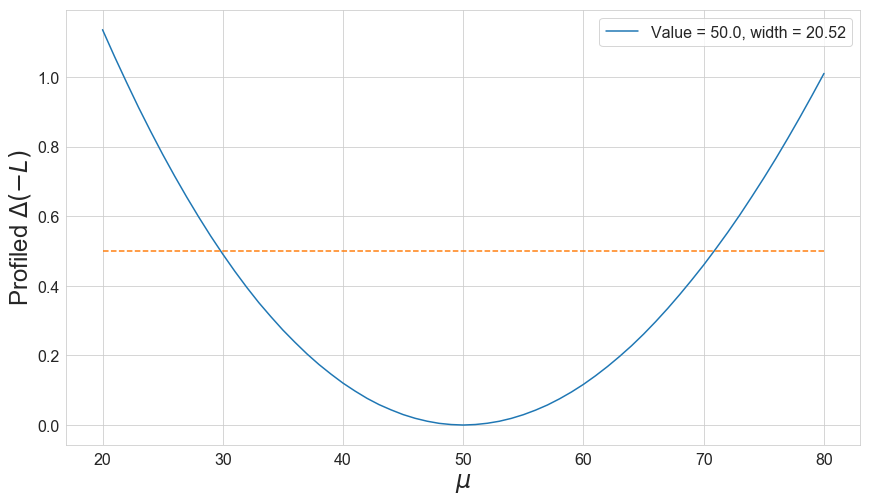

In [ ]:
plot_likelihood(nll-nll.min())

## BM 2

In [ ]:
nll = profiler(f_s=f_s, n_steps=100, **b_shapes)

In [ ]:
nll = to_np(nll)

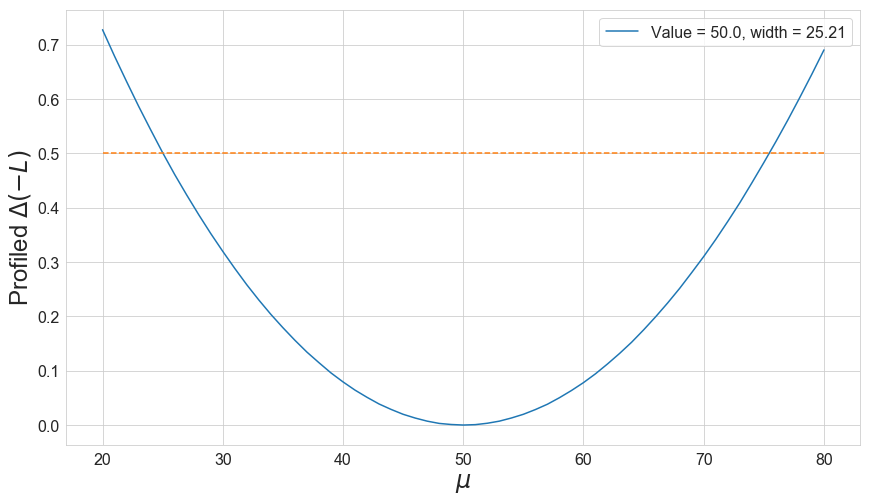

In [ ]:
plot_likelihood(nll-nll.min())